<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Juan Malagon.
<br>
<i><b>Asignatura:</b></i> REDES NEURONALES.
<br>
<i><b>Estudiante:</b></i> Carlos Rojas - Sebastian Florido - Luis Rodriguez.
<br>
<i><b>Tema:</b></i> Parcial corte 2.
<br>
<i><b>9 Octubre 2023 </b></i>
</FONT>
</div>

# Introducción a redes neuronales
---

- **Taller 2**: el perceptron multicapa
- **Fecha de entrega**: 9 de Octubre de 2023.
- **Enlace de entrega**: https://docs.google.com/forms/d/e/1FAIpQLScJKUfR5stOZTqJezH8Q1TjSoFxv6Eoo02jbcp-57T60SKYIw/viewform?usp=sf_link

Importamos librerías:

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from keras.metrics import MeanSquaredError

#1. Cargue el conjunto de datos MNIST

Use KERAS para cargar el conjunto de datos MNIST, una vez cargado añada ruido aleatorio, tanto en el conjunto de entrenamiento como el de validación. Deberá obtener cuatro conjuntos: entrenamiento+ruido, test+ruido, entrenamiento simple y test simple.

Muestre un ejemplo para cada una de las etiquetas con y sin ruido (Tómelos del conjunto de entrenamiento).

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [ ]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

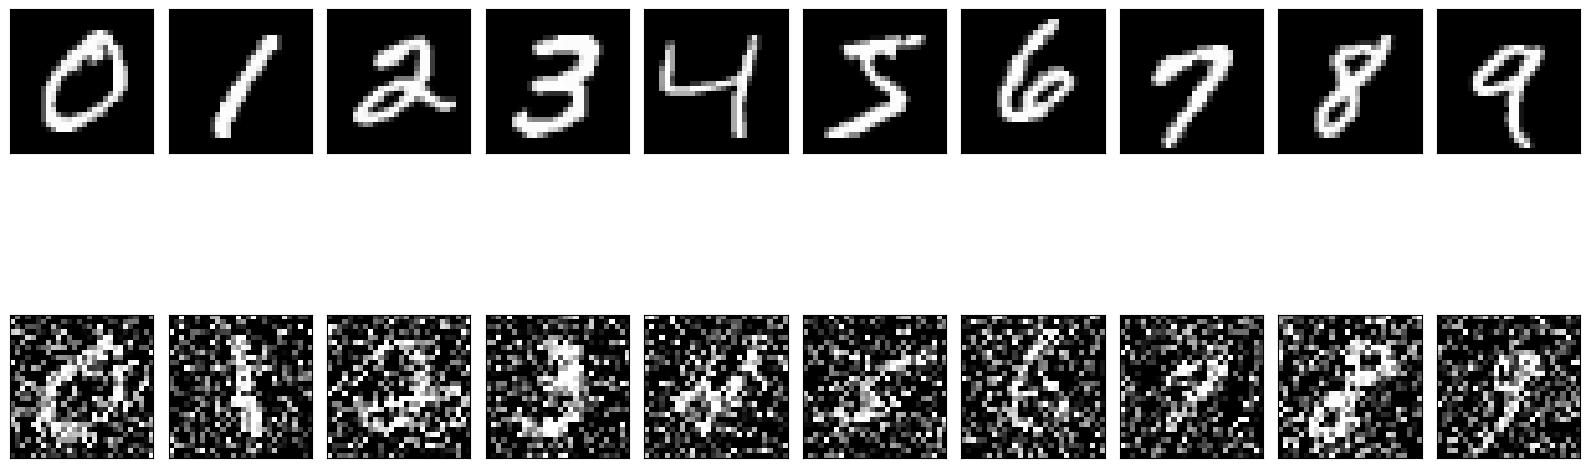

In [ ]:
plt.figure(figsize=(16, 8))

for i in range(10):
    index_clean = np.where(y_train == i)[0][0]
    index_noisy = np.where(y_train == i)[0][1]

    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_train[index_clean].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(x_train_noisy[index_noisy].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

# 2. Proponga una estructura neuronal

En este caso, construirá una red neuronal que sea capaz de limpiar nuestras imágenes. Por lo cual, los conjuntos con ruido serán los datos de entrada y las imágenes limpias la salida. Tomando esto en consideración, proponga una estructura neuronal capaz de realizar dicha tarea.

**Pistas:**


1.   Recuerde aplanar las imágenes usando reshape o una capa de flatten.
2.   Recuerde que la entrada como la salida serán vectores de 784.
3.   La capa intermedia deberá tener menos neuronas que la de entrada y salida.
4.   Piense si esto es una tarea de clasificación o de regresión para que pueda seleccionar adecuadamente la función de coste.
4.   Deberá realizar pruebas para determinar las características de la red neuronas (regularizaciones, valores de learning rate. )




In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [ ]:
model.add(Reshape((28, 28)))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 218192 (852.31 KB)
Trainable params: 21819

# 3. Entrena la red neuronal y demuestre su desempeño

Entrene la red neuronal y demuestre el desempeñó. Justifique su elección tanto de función de perdida como de métrica de evaluación. Adicionalmente, muestre los resultados obtenidos para el conjunto de test (recuerde convertir su vector de 784 a una imagen de 28x28).

In [ ]:
history = model.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 13s 5ms/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 7/10
375/375 [=======

In [ ]:
test_loss, test_mse = model.evaluate(x_test_noisy, x_test, verbose=0)
print(f'Test Loss: {test_loss}, Test MSE: {test_mse}')

Test Loss: 0.01818152703344822, Test MSE: 0.01818152330815792


313/313 [==============================] - 1s 2ms/step


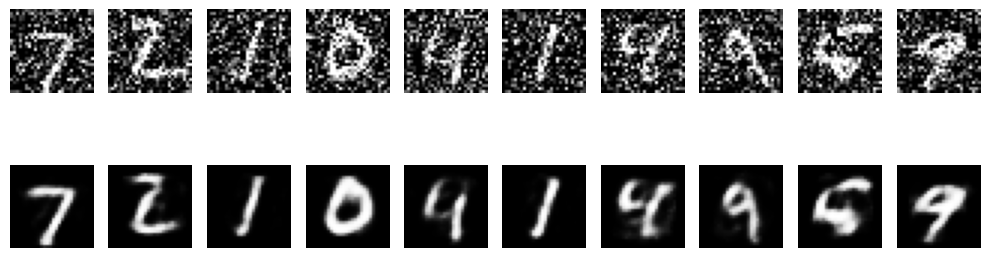

In [ ]:
def show_reconstructed_images_in_order(model, x_test_noisy, num_images=10):
    reconstructed_images = model.predict(x_test_noisy)
    plt.figure(figsize=(10, 4))

    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        plt.subplot(2, num_images, i + num_images + 1)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

show_reconstructed_images_in_order(model, x_test_noisy)

# **Justificacion**
En este caso, hemos configurado la métrica de evaluación como el Error Cuadrático Medio MSE al compilar el modelo. El MSE es una métrica apropiada para problemas de regresión, como la reconstrucción de imágenes, donde el objetivo es medir la calidad de la reconstrucción. El MSE mide la diferencia cuadrada promedio entre los valores de píxeles de las imágenes originales y las imágenes reconstruidas. Esto es especialmente adecuado para imágenes, ya que penaliza eficazmente las diferencias grandes entre los píxeles. En la reconstrucción de imágenes, es crucial minimizar las diferencias de intensidad entre píxeles para obtener imágenes reconstruidas de alta calidad.

# 4. Extraiga la representación

Recuerde que la capa intermedia DEBE tener un tamaño menor a las capas de entrada y de salida. Extraiga los valores de dicha capa para cada una de las imágenes. Use una técnica de reducción de dimensionalidad (PSA, TSNE ...) y observe un diagrama de dispersión de la representación neuronal etiquetado con cada una de las clases del conjunto de datos.

In [ ]:
intermediate_layer_model = Sequential(model.layers[:-2])

In [ ]:
intermediate_layer_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
intermediate_layer_output = intermediate_layer_model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(intermediate_layer_output)

In [ ]:
labels = y_test

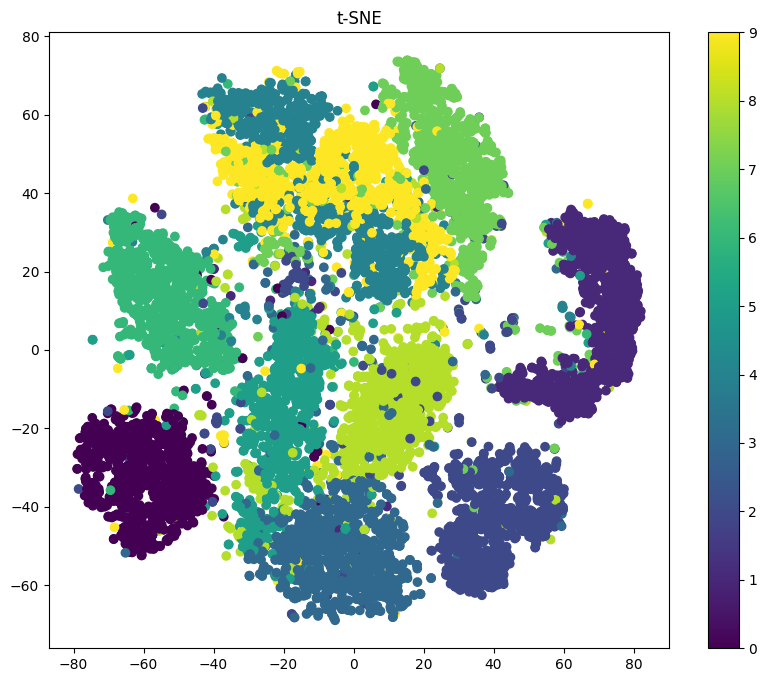

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE')
plt.show()